### 입력값 1개, 출력값 1개: y = w1 * X1 + bias (단순회귀)
### 입력값 2개, 출력값 1개: y = w1 * X1 + w2 * X2 + bias(다중회귀)

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [6]:
# 데이터
x_train = [] # 배열
for i in range(1, 101):
    x_train.append([i, 10]) # 배열

x_train = np.array(x_train) # list -> ndarray   
print(x_train.shape) # 구조
print(x_train[0:5])

(100, 2)
[[ 1 10]
 [ 2 10]
 [ 3 10]
 [ 4 10]
 [ 5 10]]


In [8]:
# 데이터 -> 실제값, Target
# 1, 10 -> 68.0  2, 10 -> 143.0  3, 10 -> 218.0
y_train = []
for i in range(len(x_train)):
    target = (x_train[i][0] * x_train[i][1] / 2) * 5 * 3 - 7
    # print(target)
    y_train.append([target])

y_train = np.array(y_train)

print(y_train.shape)
print(y_train[0:5])

(100, 1)
[[ 68.]
 [143.]
 [218.]
 [293.]
 [368.]]


In [23]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass


model = Sequential() # 객체 생성
# Dense: 전결합층, 1: 출력노드(뉴런), input_dim=2: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(20, input_dim=2, activation='linear'))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='linear')) # 입력 갯수: 10, 출력 갯수: 1
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer=Adam(lr=0.001), loss='mse')
model.summary() # 네트워크 확인
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=1000, batch_size=10)

model 객체 삭제
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 23ms/step - loss: 12329649.8889 - val_loss: 45988800.0000
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 11822969.3333 - val_loss: 45752940.0000
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 10772854.8889 - val_loss: 45515400.0000
Epoch 4/1000
8/8 [===================

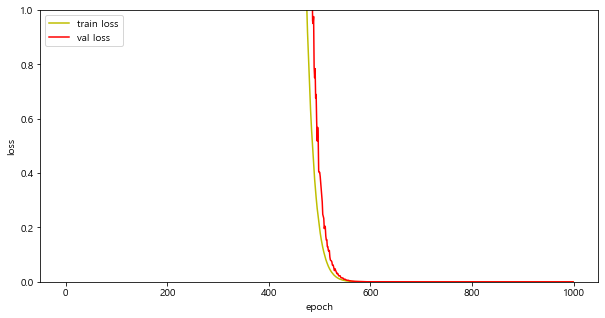

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0,  1]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

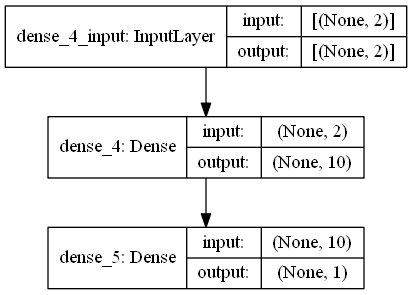

In [30]:
plot_model(model, to_file='./Basic3.png', show_shapes=True, show_layer_names=True)

In [26]:
x = np.array([[101, 10], [102, 10], [103, 10], [104, 10], [105, 10]])
for i in range(len(x)):  # 실제값 비교 목적으로 산출
    print((x[i][0] * x[i][1]) / 2 * 5 * 3 - 7)

y = np.array([7568, 7643, 7718, 7793, 7868]) # 실제값

7568.0
7643.0
7718.0
7793.0
7868.0


In [28]:
p = model.predict(x) # 모델 사용
print(p.shape)
print(p)
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

(5, 1)
[[7567.9995]
 [7643.    ]
 [7718.    ]
 [7792.9995]
 [7867.9995]]
x: [101  10], 실제값: 7568, 예측값: 7567.99951, 정제된값: 7568
x: [102  10], 실제값: 7643, 예측값: 7643.00000, 정제된값: 7643
x: [103  10], 실제값: 7718, 예측값: 7718.00000, 정제된값: 7718
x: [104  10], 실제값: 7793, 예측값: 7792.99951, 정제된값: 7793
x: [105  10], 실제값: 7868, 예측값: 7867.99951, 정제된값: 7868


In [33]:
# 개선이 이루어지지않으면 Kernel restart를 이용한 초기화 고려